<font size = "5"> **EELS_Tools:  [Spectroscopy](../4_EELS_Tools.ipynb)** </font>

<hr style="height:1px;border-top:4px solid #FF8200" />

# Analysis of EDS Spectra
<br>

[<img src=https://www.coeuscreativegroup.com/wp-content/uploads/2020/04/download-button.png, width=125>](https://raw.githubusercontent.com/pycroscopy/pyTEMlib/main/notebooks/Spectroscopy/EDS.ipynb) 

[![OpenInColab](https://colab.research.google.com/assets/colab-badge.svg)](
    https://colab.research.google.com/github/pycroscopy/pyTEMlib/blob/main/notebooks/Spectroscopy/EDS.ipynb)
    
part of 

<font size = "5"> **[pyTEMlib](https://pycroscopy.github.io/pyTEMlib/about.html)**</font>

a [pycroscopy](https://pycroscopy.github.io/pycroscopy/about.html) ecosystem package



Notebook by Gerd Duscher, 2025

Microscopy Facilities<br>
Institute of Advanced Materials & Manufacturing<br>
The University of Tennessee, Knoxville

Model based analysis and quantification of data acquired with transmission electron microscopes

## Content
An Introduction into displaying and analyzing EDS spectrum images and spectra
This works also on Google Colab.


## Prerequesites

### Install pyTEMlib

If you have not done so in the [Introduction Notebook](_.ipynb), please test and install [pyTEMlib](https://github.com/gduscher/pyTEMlib) and other important packages with the code cell below.


In [ ]:
import sys
import importlib.metadata

def test_package(package_name):
    """Test if package exists and returns version or -1"""
    try:
        version = importlib.metadata.version(package_name)
    except importlib.metadata.PackageNotFoundError:
        version = '-1'
    return version


# pyTEMlib setup ------------------
if test_package('pyTEMlib') < '0.2025.10.0':
    print('installing pyTEMlib')
   
    !{sys.executable} -m pip install pyTEMlib -q --upgrade
# ------------------------------
print('done')

installing pyTEMlib
done


In [ ]:
!{sys.executable} -m pip install git+https://github.com/pycroscopy/SciFiReaders/ --no-deps 


### Loading of necessary libraries

Please note, that we only need to load the pyTEMlib library, which is based on sidpy Datsets.



In [2]:
%matplotlib widget
import sys
import numpy as np
import matplotlib.pylab as plt

# using  pyTEMlib.eds_tools, pyTEMlib.file_tools and pyTEMlib.eels_tools (for line definitions)
sys.path.insert(0, '..//..//')
sys.path.insert(0, '..//..//..//SciFiReaders//')

    
%load_ext autoreload
%autoreload 2
import SciFiReaders
    
import pyTEMlib

if 'google.colab' in sys.modules:
    from google.colab import output
    output.enable_custom_widget_manager()
    from google.colab import drive

if 'google.colab' in sys.modules:
    drive.mount("/content/drive")

# For archiving reasons it is a good idea to print the version numbers out at this point
print('pyTEM version: ',pyTEMlib.__version__)
__notebook__ = 'EDS_Spectrum_Analysis'
__notebook_version__ = '2025_10_27'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
You don't have igor2 installed.     If you wish to open igor files, you will need to install it     (pip install igor2) before attempting.
pyTEM version:  0.2025.10.0


## Open File

### Load File

Select a main dataset and any additional data like reference data and such.

In [10]:
print('pyTEM version: ',pyTEMlib.__version__)

pyTEM version:  0.2025.10.0


In [11]:
fileWidget = pyTEMlib.file_tools.FileWidget()

### Select and Plot Dataset

Select a dataset from the drop down value and display it with the code cell below.

Here we sum the spectra of the 4 quadrants and define the detector parameter.

In [13]:
help(fileWidget)

Help on FileWidget in module pyTEMlib.file_tools object:

class FileWidget(sidpy.io.interface_utils.FileWidget)
 |  FileWidget(dir_name=None, extension=['*'], sum_frames=False)
 |
 |  Widget to select directories or widgets from a list
 |
 |  Works in google colab.
 |  The widget converts the name of the nion file to the one in Nion's swift software,
 |  because it is otherwise incomprehensible
 |
 |  Attributes
 |  ----------
 |  dir_name: str
 |      name of starting directory
 |  extension: list of str
 |      extensions of files to be listed  in widget
 |
 |  Methods
 |  -------
 |  get_directory
 |  set_options
 |  get_file_name
 |
 |  Example
 |  -------
 |  >>from google.colab import drive
 |  >>drive.mount("/content/drive")
 |  >>file_list = pyTEMlib.file_tools.FileWidget()
 |  next code cell:
 |  >>datasets = file_list.datasets
 |  >>dataset = file_list.selected_dataset
 |
 |  Method resolution order:
 |      FileWidget
 |      sidpy.io.interface_utils.FileWidget
 |      built

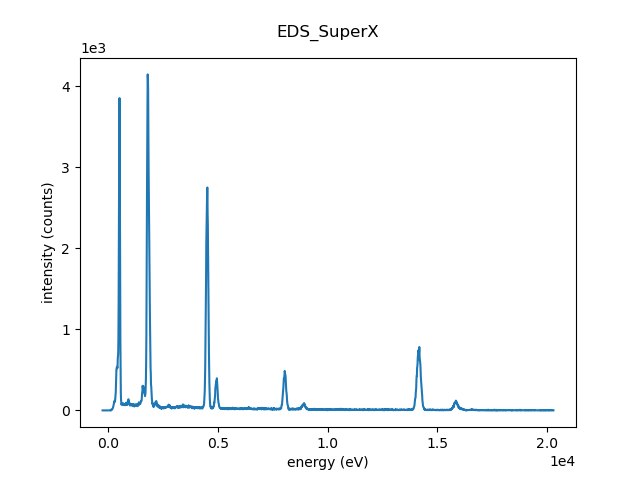

In [14]:
spectrum = fileWidget.selected_dataset
start = np.searchsorted(spectrum.energy_scale.values, 100)
energy_scale = spectrum.energy_scale.values[start:]
detector_Efficiency= pyTEMlib.eds_tools.detector_response(spectrum)  # tags, spectrum.energy_scale.values[start:])
if 'start_energy' not in spectrum.metadata['EDS']['detector']:
    spectrum.metadata['EDS']['detector']['start_energy'] = 120
spectrum[:np.searchsorted(spectrum.energy_scale.values,spectrum.metadata['EDS']['detector']['start_energy'])] = 0.
spectrum.metadata['EDS']['detector']['detector_efficiency']  = detector_Efficiency
view = spectrum.plot()

## Find Elements 

c:\Users\gduscher\AppData\Local\anaconda3\Lib\site-packages\dask\array\core.py:1744: FutureWarning: The `numpy.argsort` function is not implemented by Dask array. You may want to use the da.map_blocks function or something similar to silence this warning. Your code may stop working in a future release.
  warnings.warn(


['Cu', 'O', 'Ti', 'Sr']


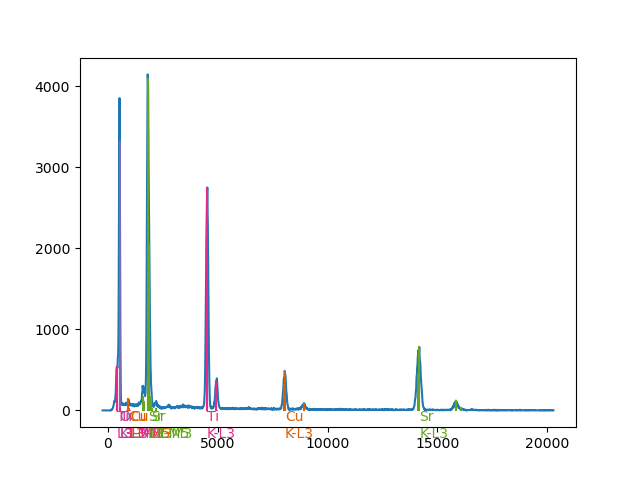

In [4]:
# --------Input -----------
minimum_number_of_peaks = 10
# --------------------------
minor_peaks = pyTEMlib.eds_tools.detect_peaks(spectrum, minimum_number_of_peaks=minimum_number_of_peaks)

keys = list(spectrum.metadata['EDS'].keys())
for key in keys:
    if len(key) < 3:
        del spectrum.metadata['EDS'][key]

elements = pyTEMlib.eds_tools.find_elements(spectrum, minor_peaks)

print(elements) 
spectrum.metadata['EDS'].update(pyTEMlib.eds_tools.get_x_ray_lines(spectrum, elements))
plt.figure()
plt.plot(spectrum.energy_scale,spectrum, label = 'spectrum')
pyTEMlib.eds_tools.plot_lines(spectrum.metadata['EDS'], plt.gca())


## Quantify

### Fit spectrum

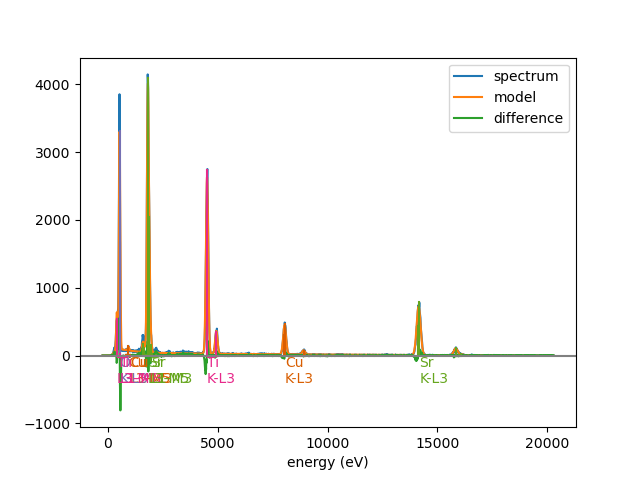

In [26]:
peaks, pp = pyTEMlib.eds_tools.fit_model(spectrum, use_detector_efficiency=True)
model = pyTEMlib.eds_tools.get_model(spectrum)

plt.figure()
plt.plot(spectrum.energy_scale, spectrum, label='spectrum')
plt.plot(spectrum.energy_scale, model, label='model')
plt.plot(spectrum.energy_scale, spectrum-model, label='difference')
plt.xlabel('energy (eV)')
pyTEMlib.eds_tools.plot_lines(spectrum.metadata['EDS'], plt.gca())
plt.axhline(y=0, xmin=0, xmax=1, color='gray')
plt.legend()

### Quantify Spectrum
first with Bote-Salvat cross section
using dictionaries calculated with [emtables package](https://github.com/adriente/emtables/blob/main/).

In [27]:
pyTEMlib.eds_tools.quantify_EDS(spectrum, mask =['Cu'])

using cross sections for quantification
O : 51.02 at% 20.51 wt%
Ti: 28.42 at% 34.20 wt%
Sr: 20.57 at% 45.29 wt%


then with k-factor dictionary

In [28]:
q_dict = pyTEMlib.eds_tools.load_k_factors()
tags = pyTEMlib.eds_tools.quantify_EDS(spectrum, q_dict, mask = ['Cu'])

using k-factors for quantification
O : 55.62 at% 22.91 wt%
Ti: 22.51 at% 27.74 wt%
Sr: 21.87 at% 49.34 wt%
excluded from quantification  ['Cu']


### Absorption Correction
Lower energy lines will be more affected than higher x-ray lines.

At thin sample location (<50nm) absorption is not significant.

In [21]:
# ------ Input ----------
thickness_in_nm = 30
# -----------------------
pyTEMlib.eds_tools.apply_absorption_correction(spectrum, thickness_in_nm)
for key, value in spectrum.metadata['EDS']['GUI'].items():
    if 'corrected-atom%' in value:
        print(f"Element: {key}, Corrected Atom%: {value['corrected-atom%']:.2f}, Corrected Weight%: {value['corrected-weight%']:.2f}")


Element: Cu, Corrected Atom%: 0.00, Corrected Weight%: 0.00
Element: O, Corrected Atom%: 54.85, Corrected Weight%: 22.36
Element: Ti, Corrected Atom%: 22.90, Corrected Weight%: 27.94
Element: Sr, Corrected Atom%: 22.26, Corrected Weight%: 49.70


## Summary
The spectrum is modeled completely with background and characteristic peak-families.

Either 
- k-factors in a file (here from Spectra300) or
- Bothe-Salvat cross-sections
 
are used for quantification.

## Appendix
### Background
The determined background used for the model-based quantification is based on the detector effciency.

Note:

The detector efficiency is also used for the quantification model.
